<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/monai/monai_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting to know the [MONAI framework](https://monai.io/). Loosely following the [YouTube MONAI Bootcamp 2023](https://www.youtube.com/playlist?list=PLtoSVSQ2XzyAJAGzaHF0nUIkav0BnxhrJ).

[MONAI Bootcamp GitHub Repository](https://github.com/Project-MONAI/monai-bootcamp)

# Settings

In [1]:
# Check the used hardwarde. Recall to set runtime type to GPU.
!nvidia-smi

Sun Nov 26 23:06:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installs

In [2]:
!pip install monai # For 'import monai'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.2 MB/s eta 0:00:00


In [3]:
!pip install monai[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 32.1 MB/s

In [4]:
!pip install pynrrd # For 'import nrrd'

In [5]:
!pip install pydicom # E.g. for the TCIS dataset, which uses the DICOM format

In [6]:
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.1.0"

2023-11-26 23:08:37.833104: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 23:08:37.834538: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 23:08:37.834640: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 23:08:37.869061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 23:08:41.825650: W tensorflow/c

## Imports

### General

In [7]:
from typing import List, Dict, Set, Tuple, Any, Optional, Union, Callable
import time
from pathlib import Path
import tempfile
import numpy as np
import pandas as pd

import multiprocessing
import resource
import json

import psutil
import torch

### Evaluation

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from PIL import Image
from scipy import ndimage
import skimage
import nrrd

### Monai

In [40]:
from monai.apps import MedNISTDataset, DecathlonDataset, TciaDataset
from monai.apps.tcia import TCIA_LABEL_DICT
from monai.config import print_config, KeysCollection
from monai.data import (Dataset, ArrayDataset, create_test_image_3d, CacheDataset, PersistentDataset, SmartCacheDataset, DataLoader)
from monai.engines import SupervisedTrainer, SupervisedEvaluator
from monai.handlers import (
    CheckpointSaver,
    from_engine,
    LrScheduleHandler,
    MeanSquaredError,
    MetricsSaver,
    StatsHandler,
    TensorBoardStatsHandler,
    ValidationHandler
)
from monai.inferers import SimpleInferer
from monai.networks import eval_mode
from monai.networks.nets import resnet50, ViT, DenseNet121
import monai.transforms as mt
from monai.utils import set_determinism, first
set_determinism(seed=0)

In [10]:
import nibabel as nib # For NIfTI Images

#### For evaluations

In [11]:
# Model evaluation using sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [12]:
# Model evaluation using TSNE plots
from sklearn.manifold import TSNE

In [13]:
print_config()

MONAI version: 1.3.0
Numpy version: 1.23.5
Pytorch version: 2.1.0+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.3.0
Nibabel version: 4.0.2
scikit-image version: 0.19.3
scipy version: 1.11.3
Pillow version: 9.4.0
Tensorboard version: 2.14.1
gdown version: 4.6.6
TorchVision version: 0.16.0+cu118
tqdm version: 4.66.1
lmdb version: 1.4.1
psutil version: 5.9.5
pandas version: 1.5.3
einops version: 0.7.0
transformers version: 4.21.3
mlflow version: 2.8.1
pynrrd version: 1.0.0
clearml version: 1.13.2

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



# Data

In [14]:
# Settings for the test data.
img_key: str = "img"
seg_key: str = "seg"
dim_width:  int = 128
dim_height: int = 128
dim_depth:  int = 128

root_dir: str = tempfile.mkdtemp()

In [15]:
# Create the test data.
filenames: List[str] = []

for i in range(5):
    # Create a test image and a segmentation.
    img, seg = create_test_image_3d(dim_height, dim_width, dim_depth, num_objs=16, rad_max=25)

    # Create filenames to store the image and its segmentation.
    img_filename: str = f"{root_dir}/img{i}.nii.gz"
    seg_filename: str = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({img_key: img_filename, seg_key: seg_filename})

    # Save the image and its segmentation.
    n = nib.Nifti1Image(img, np.eye(4))
    nib.save(n, img_filename)
    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)

In [ ]:
filenames

[{'img': '/tmp/tmps3e1zhnq/img0.nii.gz',
  'seg': '/tmp/tmps3e1zhnq/seg0.nii.gz'},
 {'img': '/tmp/tmps3e1zhnq/img1.nii.gz',
  'seg': '/tmp/tmps3e1zhnq/seg1.nii.gz'},
 {'img': '/tmp/tmps3e1zhnq/img2.nii.gz',
  'seg': '/tmp/tmps3e1zhnq/seg2.nii.gz'},
 {'img': '/tmp/tmps3e1zhnq/img3.nii.gz',
  'seg': '/tmp/tmps3e1zhnq/seg3.nii.gz'},
 {'img': '/tmp/tmps3e1zhnq/img4.nii.gz',
  'seg': '/tmp/tmps3e1zhnq/seg4.nii.gz'}]

In [ ]:
# Load an image and its segmentation.
img_index = 0
img = nib.load(filenames[img_index][img_key])
seg = nib.load(filenames[img_index][seg_key])
img

In [ ]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 128 128 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          : [0. 1

In [ ]:
img_data = img.get_fdata()
img_data.shape

(128, 128, 128)

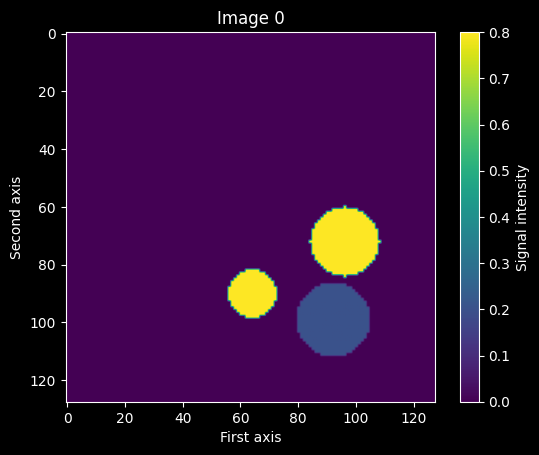

In [ ]:
mid_slice_x = img_data[img_data.shape[0]//2, :, :]
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis.
# Source: https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html
plt.imshow(mid_slice_x.T)
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.title(f"Image {img_index}")
plt.show()

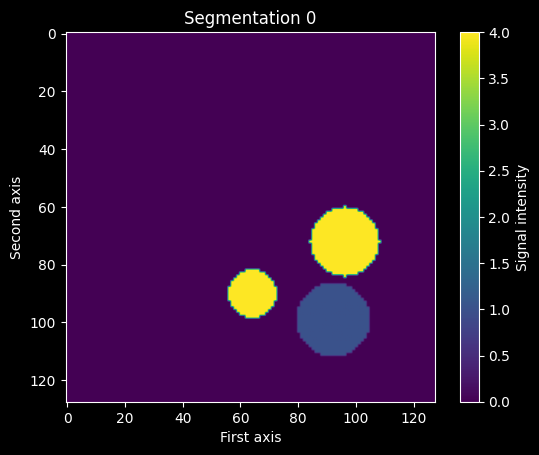

In [ ]:
seg_data = seg.get_fdata()
seg_mid_slice_x = seg_data[seg_data.shape[0]//2, :, :]
plt.imshow(seg_mid_slice_x.T)
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.title(f"Segmentation {img_index}")
plt.show()

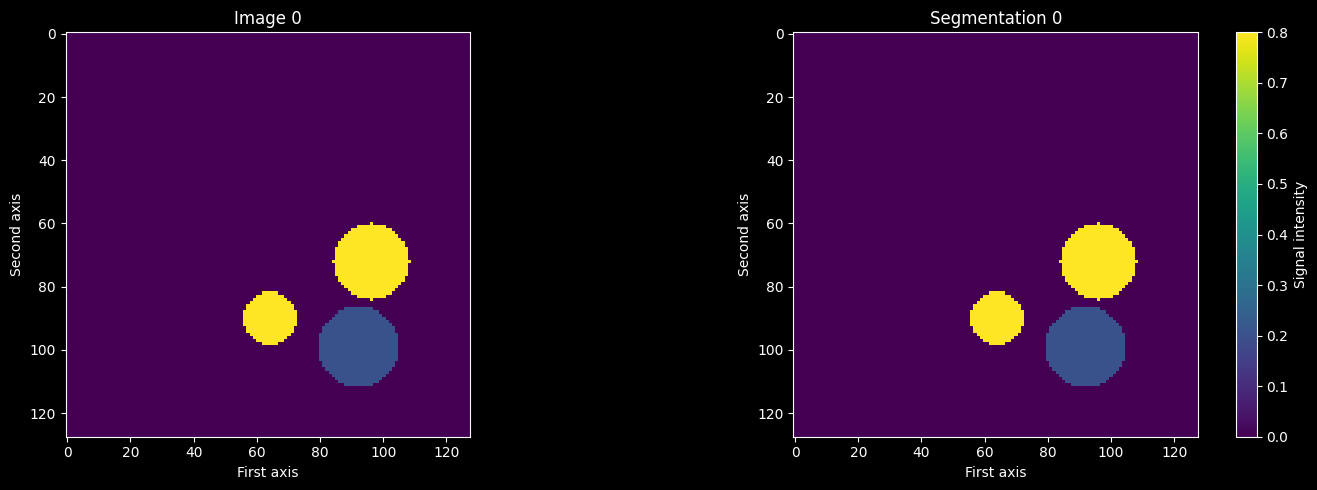

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Plot the image.
img = axes[0].imshow(mid_slice_x.T)
axes[0].set_xlabel('First axis')
axes[0].set_ylabel('Second axis')
axes[0].set_title(f"Image {img_index}")

# Plot the segmentation.
axes[1].imshow(seg_mid_slice_x.T)
axes[1].set_xlabel('First axis')
axes[1].set_ylabel('Second axis')
axes[1].set_title(f"Segmentation {img_index}")

fig.tight_layout()
plt.colorbar(img, ax=axes[1], label='Signal intensity')
fig.show()

## Custom transforms

### Lambda transforms

In [ ]:
def sum_dimension(img, dim: int = 1):
    return img.sum(dim)

Img type:  <class 'monai.data.meta_tensor.MetaTensor'>,
Img shape: torch.Size([1, 128, 128]),
Device:    -1


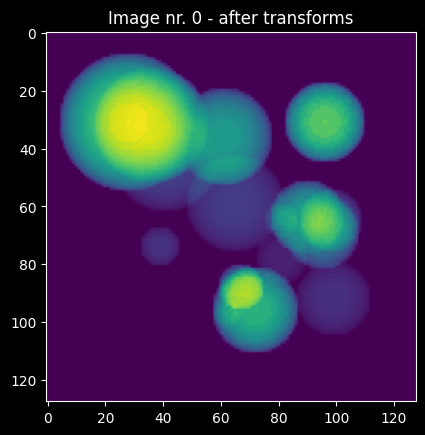

In [ ]:
transforms = mt.Compose([
    mt.LoadImage(image_only=True),
    mt.EnsureChannelFirst(),
    mt.Lambda(sum_dimension)
])
img_index: int = 0
img = transforms(filenames[img_index][img_key])
# Print information on the image that results from applying the transforms.
print(f"Img type:  {type(img)},\n"
    f"Img shape: {img.shape},\n"
    f"Device:    {img.get_device()}")
# Display the image
plt.title(f"Image nr. {img_index} - after transforms")
plt.imshow(img[img_index])
plt.show()

#### `Lambdad` can be applied using `keys`

In [ ]:
def max_dimension(img, dim: int = 1):
    return img.max(dim)

In [ ]:
key_tuple: Tuple[str] = (img_key, seg_key)
transforms = mt.Compose([
    mt.LoadImaged(key_tuple),
    mt.EnsureChannelFirstd(key_tuple),
    # Only applied to the values with key 'img_key':
    mt.Lambdad((img_key,), sum_dimension),
    # Only applied to the values with key 'seg_key':
    mt.Lambdad((seg_key,), max_dimension),
])

imgd = transforms(filenames[img_index])
img = imgd[img_key]
seg = imgd[seg_key]

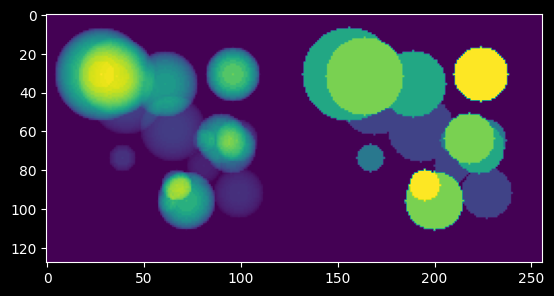

In [ ]:
plt.imshow(np.hstack((img[0] * 5 / img.max(), np.squeeze(seg[0]))))
plt.show()

### Transform subclass

In [ ]:
from monai.transforms import Transform
class SumDimension(Transform):
    def __init__(self, dim: int = 1):
        self.dim = dim

    def __call__(self, inputs):
        return inputs.sum(self.dim)

Img type:  <class 'monai.data.meta_tensor.MetaTensor'>,
Img shape: torch.Size([1, 128, 128]),
Device:    -1


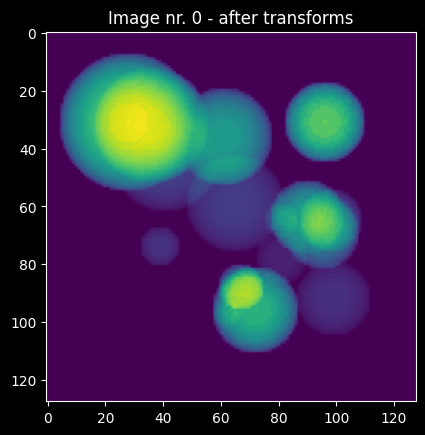

In [ ]:
transforms = mt.Compose([
    mt.LoadImage(image_only=True),
    mt.EnsureChannelFirst(),
    SumDimension(1)
])
img_index: int = 0
img = transforms(filenames[img_index][img_key])
# Print information on the image that results from applying the transforms.
print(f"Img type:  {type(img)},\n"
    f"Img shape: {img.shape},\n"
    f"Device:    {img.get_device()}")
# Display the image
plt.title(f"Image nr. {img_index} - after transforms")
plt.imshow(img[img_index])
plt.show()

In [ ]:
transforms = mt.LoadImaged(keys=(img_key, seg_key))
img_index: int = 0
data = transforms(filenames[img_index])

Since now the dictionary verion `LoadImaged` is used, the transforms are applied to the whole dataset and the meta data is passed along.

In [ ]:
print(list(data.keys()))

['img', 'seg']


## Dataset

In [ ]:
image_filenames: List[str] = [fn[img_key] for fn in filenames]
segmentation_filenames: List[str] = [fn[seg_key] for fn in filenames]

In [ ]:
img_transforms = mt.Compose([
    mt.LoadImage(image_only=True),
    mt.EnsureChannelFirst(),
    mt.RandSpatialCrop((dim_height, dim_width, dim_depth), random_size=False),
    mt.RandGaussianNoise(.5, 1, 1),
])
# Define a 'Dataset' object based on the image file names and using transforms.
ds = Dataset(image_filenames, img_transforms)

img_tensor = ds[0]
print(img_tensor.shape, img_tensor.get_device())

torch.Size([1, 128, 128, 128]) -1


## ArrayDataset

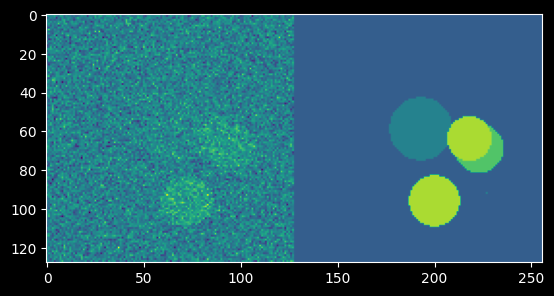

In [ ]:
seg_transforms = mt.Compose([
    mt.LoadImage(image_only=True),
    mt.EnsureChannelFirst(),
    mt.RandSpatialCrop((dim_height, dim_width, dim_depth), random_size=False),
])

# Define an 'ArrayDataset' object, loading the image and segmentation data with a different set of transforms.
ds = ArrayDataset(image_filenames, img_transforms, segmentation_filenames, seg_transforms)
img, seg = ds[0]
plt.imshow(np.hstack([img.numpy()[0, 48], seg.numpy()[0, 48]]))
plt.show()

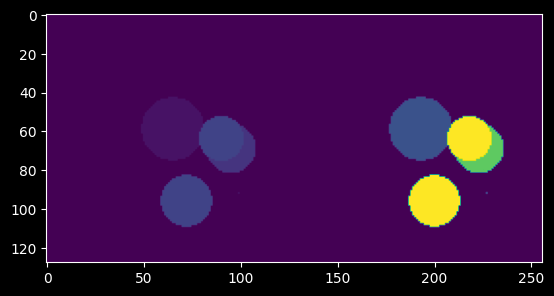

In [ ]:
# Lets do a similar operation but using dictionary transforms tailored to the
# target data.
transforms = mt.Compose([
    mt.LoadImaged((img_key, seg_key)),
    mt.EnsureChannelFirstd((img_key, seg_key)),
    # Apply the Gaussian Noise only to the image data, not the segmentation.
    mt.RandGaussianNoised((img_key,)),
    mt.RandSpatialCropd((img_key, seg_key), (dim_height, dim_width, dim_depth), random_size=False),
])

ds = Dataset(filenames, transforms)
img, seg = ds[0][img_key], ds[0][seg_key]
plt.imshow(np.hstack([img.numpy()[0, 48], seg.numpy()[0,48]]))
plt.show()

# Dataset Example: MedMNIST - Large-scale lightweight benchmark for 2D and 3D biomedical image classification
- [MedMNIST Homepage](https://medmnist.com/)

In [29]:
ds_mnist_train = MedNISTDataset(root_dir="./", section="training", download=True)

2023-11-26 23:54:37,227 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-11-26 23:54:37,233 - INFO - File exists: MedNIST.tar.gz, skipped downloading.
2023-11-26 23:54:37,235 - INFO - Non-empty folder exists in MedNIST, skipped extracting.


Loading dataset: 100%|██████████| 47164/47164 [00:43<00:00, 1080.73it/s]


In [30]:
ds_mnist_val = MedNISTDataset(root_dir="./", section="validation", download=True)

2023-11-26 23:55:21,353 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-11-26 23:55:21,354 - INFO - File exists: MedNIST.tar.gz, skipped downloading.
2023-11-26 23:55:21,358 - INFO - Non-empty folder exists in MedNIST, skipped extracting.


Loading dataset: 100%|██████████| 5895/5895 [00:06<00:00, 944.63it/s]


In [31]:
ds_mnist_test = MedNISTDataset(root_dir="./", section="test", download=True)

2023-11-26 23:55:28,208 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-11-26 23:55:28,213 - INFO - File exists: MedNIST.tar.gz, skipped downloading.
2023-11-26 23:55:28,219 - INFO - Non-empty folder exists in MedNIST, skipped extracting.


Loading dataset: 100%|██████████| 5895/5895 [00:09<00:00, 645.70it/s]


In [ ]:
# from monai.data.utils import partition_dataset_classes

# class_names = np.arange(len(filenames)) # Fill this with task specific data.

# parts = partition_dataset_classes(
#     data=np.arange(len(filenames)),
#     classes=class_names,
#     # For a 80%-10%-10% split for training, validation and test split.
#     ratios=(8, 1, 1),
#     shuffle=True,
#     seed=42
# )

In [39]:
# Defining the transforms.
random_seed = 12345678
num_class: int = ds_mnist_train.num_class

aug_prob: float = .5
aug_transforms = mt.Compose([
    mt.RandRotate(range_x=15, prob=aug_prob, keep_size=True).set_random_state(random_seed),
    mt.RandFlip(spatial_axis=0, prob=aug_prob).set_random_state(random_seed),
    mt.RandZoom(min_zoom=.9, max_zoom=1.1, prob=aug_prob).set_random_state(random_seed),
])

loading_transforms = mt.Compose([
    mt.LoadImage(image_only=True),
    mt.EnsureChannelFirst(),
    mt.ScaleIntensity(),
    aug_transforms
])

train_transforms = mt.Compose([
    loading_transforms,
    aug_transforms
])

val_transforms = mt.Compose([loading_transforms])

act = mt.Compose([mt.Activations(softmax=True)])
to_onehot = mt.Compose([mt.AsDiscrete(to_onehot=num_class)])

In [41]:
learning_rate = 1e-5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = DenseNet121(spatial_dims=2, in_channels=1, out_channels=num_class).to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), learning_rate)

In [42]:
# https://github.com/Project-MONAI/monai-bootcamp/blob/main/MONAICore/MONAI%20End-to-End%20Workflow%20-%20Solution.ipynb

# Dataset Example: Decathlon
- [Decathlon Homepage](http://medicaldecathlon.com/)

In [ ]:
ds_decathlon = DecathlonDataset(root_dir="./", task="Task09_Spleen", section="training", download=True)

Task09_Spleen.tar: 1.50GB [01:18, 20.6MB/s]                            

2023-11-25 01:06:52,334 - INFO - Downloaded: Task09_Spleen.tar


2023-11-25 01:06:55,391 - INFO - Verified 'Task09_Spleen.tar', md5: 410d4a301da4e5b2f6f86ec3ddba524e.
2023-11-25 01:06:55,394 - INFO - Writing into directory: ..


Loading dataset: 100%|██████████| 33/33 [01:04<00:00,  1.95s/it]


# Dataset Example: TCIA - The Cancer Imaging Archive
- [TCIA Homepage](https://www.cancerimagingarchive.net/)

Use for cancer imaging.

In [ ]:
import pydicom
ds_tcia = TciaDataset(
    root_dir="./",
    collection="QIN-PROSTATE-Repeatability",
    section="training",
    download=True,
    download_len=1,
    seg_type="SEG",
    progress=True,
    cache_rate=.0,
    val_frac=.2
)

print(ds_tcia.datalist[0])
print(len(ds_tcia.datalist))

2023-11-25 01:12:29,998 - INFO - Expected md5 is None, skip md5 check for file QIN-PROSTATE-Repeatability/1.2.276.0.7230010.3.1.3.1426846371.19508.1513205205.886.zip.
2023-11-25 01:12:29,999 - INFO - File exists: QIN-PROSTATE-Repeatability/1.2.276.0.7230010.3.1.3.1426846371.19508.1513205205.886.zip, skipped downloading.
2023-11-25 01:12:30,005 - INFO - Writing into directory: ./QIN-PROSTATE-Repeatability/raw/1.2.276.0.7230010.3.1.3.1426846371.19508.1513205205.886.


OptionalImportError: ignored

# Custom network definition

In [ ]:
from monai.networks.blocks import Convolution as Conv
from monai.networks.layers import split_args, Pool, Act

class MyNetwork(torch.nn.Module):
    def __init__(self, dims:int=3, in_channels:int=1, out_channels:int=8, kernel_size:int=3, pool_kernels:int=2, act:str="relu"):
        super(MyNetwork, self).__init__()
        # Convolution:
        self.conv = Conv[Conv.CONV, dims](in_channels, out_channels, kernel_size=kernel_size)
        # Activation:
        act_type, act_args = split_args(act)
        self.act = Act[act_type](**act_args)
        # Pooling:
        self.pool = Pool[Pool.MAX, dims](pool_kernels)

    def forward(self, x: torch.Tensor):
        x = self.conv(x)
        x = self.act(x)
        x = self.pool(x)
        return x

In [ ]:
from monai.networks.nets import UNet

net = UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=[8, 16, 32],
    strides=[2, 2],
)

In [ ]:
# Look out for TensorBoard Handler.
# Look out for loading checkpoints and all evaluation workflows.
# If no solution, run '|eval.yaml'